In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr

# ***Import Dataset***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Mini Project/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning/Improving Employee Retention.xlsx')

# ***Exploratory Data Analysis***

### *Descriptive Analysis*

In [ ]:
# Atur tampilan maksimum kolom
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [ ]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [ ]:
# Memisahkan kolom berdasarkan tipe datanya
nums = df.select_dtypes(include=[int, float]).columns.tolist()
cats = df.select_dtypes(include=[object]).columns.tolist()

In [ ]:
df[cats].describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


In [ ]:
# Mencari tahu nilai null
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, dtype, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,dtype,null_values,null_percentage,unique_values,unique_sample
0,Username,object,0,0.00,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.00,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.00,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.00,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.00,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [ ]:
df.duplicated().sum()

0

# ***Univariate Analysis***

In [ ]:
df1 = df.copy()

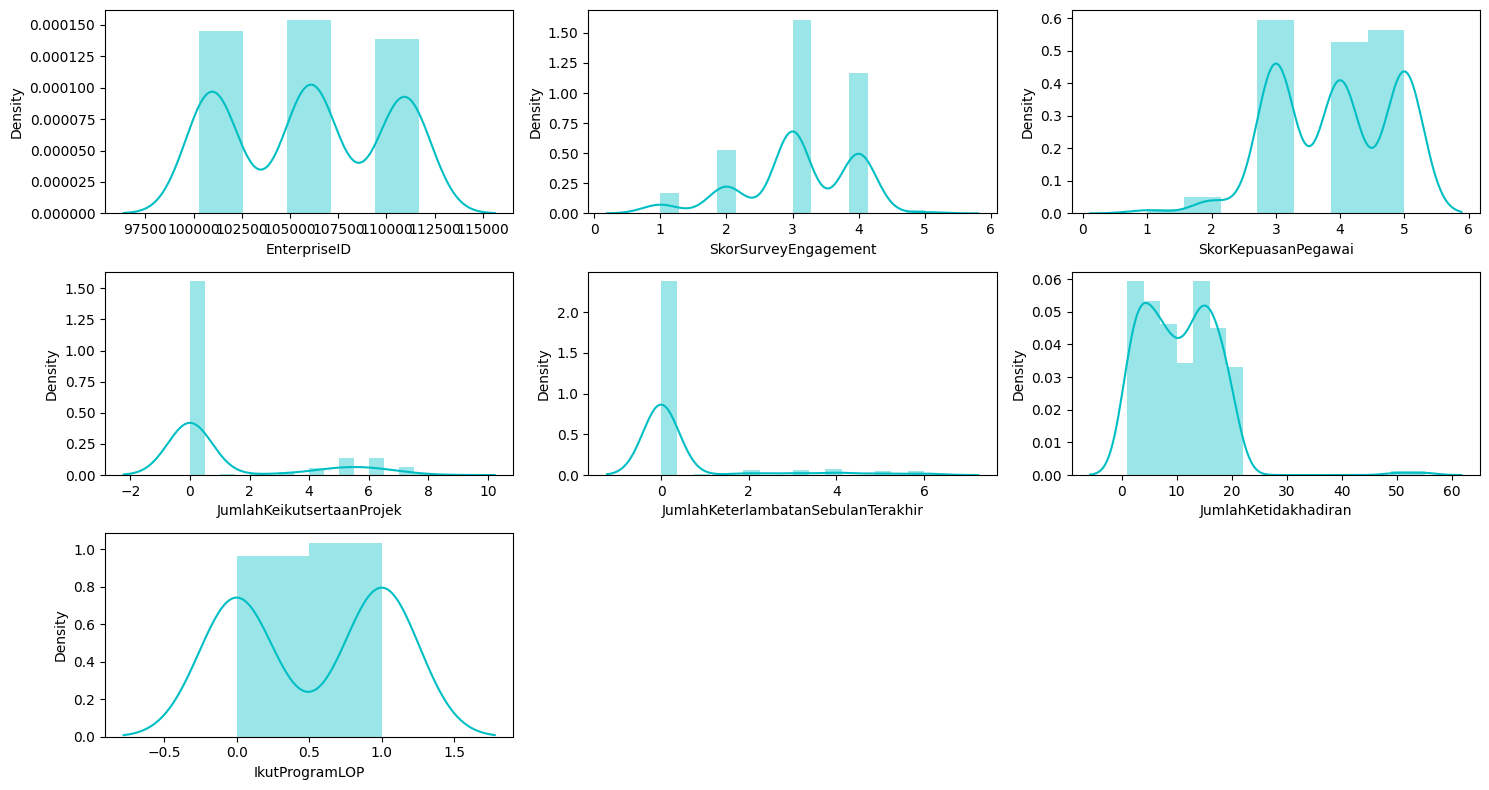

In [ ]:
# cek distribusi fitur numerikal
plt.figure(figsize=(15, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df1[nums[i]], color='#00bfc4')
    plt.tight_layout()

Terdapat outliers di beberapa kolom.

# ***Data Preprocessing***

### *Handle Missing Value*

In [ ]:
missing_value = df1.isnull().sum().reset_index()
missing_value.columns = ['Feature', 'Missing Value']
missing_value

,Feature,Missing Value
0,Username,0
1,EnterpriseID,0
2,StatusPernikahan,0
3,JenisKelamin,0
4,StatusKepegawaian,0
5,Pekerjaan,0
6,JenjangKarir,0
7,PerformancePegawai,0
8,AsalDaerah,0
9,HiringPlatform,0


In [ ]:
# Handle Missing Value kolom Skor Kepuasan Pelanggan
df1['SkorKepuasanPegawai'].fillna(df1['SkorKepuasanPegawai'].median(), inplace=True)

In [ ]:
# Handle Missing Value kolom Jumlah Keikutsertaan Projek
df1['JumlahKeikutsertaanProjek'].fillna(df1['JumlahKeikutsertaanProjek'].median(), inplace=True)

In [ ]:
# Handle Missing Value kolom Jumlah Keterlambatan Sebulan Terakhir
df1['JumlahKeterlambatanSebulanTerakhir'].fillna(df1['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)

In [ ]:
# Handle Missing Value kolom Jumlah Ketidakhadiran
df1['JumlahKetidakhadiran'].fillna(df1['JumlahKetidakhadiran'].median(), inplace=True)

In [ ]:
# Handle Missing Value kolom Alasan Resign
mode_value = df1['AlasanResign'].mode()[0]
df1['AlasanResign'].fillna(mode_value, inplace=True)

In [ ]:
# Drop kolom Ikut Program LOP
df1 = df1.drop(columns = ['IkutProgramLOP'])

In [ ]:
missing_value = df1.isnull().sum().reset_index()
missing_value.columns = ['Feature', 'Missing Value']
missing_value

,Feature,Missing Value
0,Username,0
1,EnterpriseID,0
2,StatusPernikahan,0
3,JenisKelamin,0
4,StatusKepegawaian,0
5,Pekerjaan,0
6,JenjangKarir,0
7,PerformancePegawai,0
8,AsalDaerah,0
9,HiringPlatform,0


In [ ]:
df1.duplicated().sum()

0

Tidak terdapat nilai duplikat.

### *Mengganti value yang tidak sesuai*

In [ ]:
# Mengganti value yang tidak sesuai pada kolom Pernah Bekerja
df1['PernahBekerja'] = df1['PernahBekerja'].replace('yes', '1')

In [ ]:
# Mengganti value yang tidak sesuai pada kolom Status Pernikahan
df1['StatusPernikahan'] = df1['StatusPernikahan'].replace('-', 'Belum_menikah')

In [ ]:
# Mengganti value yang tidak sesuai pada kolom Status Pernikahan
df1['StatusPernikahan'] = df1['StatusPernikahan'].replace('Lainnya', 'Belum_menikah')

In [ ]:
# Mengganti value yang tidak sesuai pada kolom Alasan Resign
df1['AlasanResign'] = df1['AlasanResign'].replace('Product Design (UI & UX)', 'masih_bekerja')

In [ ]:
# Menghapus kolom Pernah Bekerja karena hanya memiliki satu unique value (konstanta)
df1 = df1.drop(columns = ['PernahBekerja'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

Key Takeaways:
- Terdapat missing value di kolom **Kepuasan Pelanggan, Jumlah Keikutsertaan Projek, Keterlambatan Sebulan Terakhir, Jumlah Ketidakhadiran, Alasan Resgin, Ikut Program LOP**
- Mengganti null values pada kolom **Kepuasan Pelanggan, Jumlah Keikutsertaan Projek, Keterlambatan Sebulan Terakhir, Jumlah Ketidakhadiran** dengan nilai **median**, agar tidak dipengaruhi oleh outliers.
- Mengganti null values pada kolom **Alasan Resign** dengan nilai **modus**, untuk mempertahankan distribusi data.
- **Drop** kolom **Ikut Program LOP** karena terlalu banyak null values mencapai 89,90%.
- Tidak terdapat nilai duplikat.
- Mengganti value **'yes'** pada kolom pernah bekerja menjadi **1**.
- Mengganti value **'-'** pada kolom Status Pernikahan menjadi **Belum Menikah** karena value tersebut yang paling banyak keluar.
- Mengganti value **Product Design (UI & UX)** pada kolom Alasan Resign menjadi **masih bekerja**, karena value tersebut yang paling banyak keluar.
- Menghapus kolom **Pernah Bekerja** karena hanya memiliki satu unique value (konstanta).

# ***Membuat Tabel Agregat***

In [ ]:
df_agg = df1.copy()

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [ ]:
# Mengganti tipe data Tanggal Hiring dari object menjadi datetime
df_agg['TanggalHiring'] = pd.to_datetime(df_agg['TanggalHiring'])

In [ ]:
# Mengganti nilai tidak valid dengan NaN
df_agg['TanggalResign'] = df_agg['TanggalResign'].replace('-', pd.NaT)

# Mengganti tipe data Tanggal Resign dari object menjadi datetime
df_agg['TanggalResign'] = pd.to_datetime(df_agg['TanggalResign'])

In [ ]:
# Mengambil hanya tahun dari Tanggal Hiring dan Tanggal Resign
df_agg['TahunHiring'] = df_agg['TanggalHiring'].dt.year
df_agg['TahunResign'] = df_agg['TanggalResign'].dt.year

In [ ]:
# Membuat tabel agregat untuk jumlah karyawan yang masuk berdasarkan tahun hiring
tabel_hiring = df_agg.groupby('TahunHiring').size().reset_index(name='JumlahKaryawanMasuk')
tabel_hiring

,TahunHiring,JumlahKaryawanMasuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [ ]:
# Membuat tabel agregat untuk jumlah karyawan yang keluar berdasarkan tahun resign
tabel_resign = df_agg.groupby('TahunResign').size().reset_index(name='JumlahKaryawanKeluar')
tabel_resign['TahunResign'] = tabel_resign['TahunResign'].astype(int)
tabel_resign

,TahunResign,JumlahKaryawanKeluar
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


In [ ]:
# Menggabungkan dua tabel tersebut dengan outer join
tabel_gabungan = pd.merge(tabel_hiring, tabel_resign, left_on='TahunHiring', right_on='TahunResign', how='outer')
tabel_gabungan

,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar
0,2006.0,1.0,NaN,NaN
1,2007.0,2.0,NaN,NaN
2,2008.0,2.0,NaN,NaN
3,2009.0,7.0,NaN,NaN
4,2010.0,8.0,NaN,NaN
5,2011.0,76.0,NaN,NaN
6,2012.0,41.0,NaN,NaN
7,2013.0,43.0,2013.0,5.0
8,2014.0,56.0,2014.0,12.0
9,2015.0,31.0,2015.0,8.0


In [ ]:
# Mengisi nilai NaN dengan 0 karena join outer mungkin menghasilkan NaN di salah satu kolom
tabel_gabungan = tabel_gabungan.fillna(0)
tabel_gabungan

,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar
0,2006.0,1.0,0.0,0.0
1,2007.0,2.0,0.0,0.0
2,2008.0,2.0,0.0,0.0
3,2009.0,7.0,0.0,0.0
4,2010.0,8.0,0.0,0.0
5,2011.0,76.0,0.0,0.0
6,2012.0,41.0,0.0,0.0
7,2013.0,43.0,2013.0,5.0
8,2014.0,56.0,2014.0,12.0
9,2015.0,31.0,2015.0,8.0


In [ ]:
# Mengganti tipe data float ke integer
tabel_gabungan['TahunResign'] = tabel_gabungan['TahunResign'].astype(int)
tabel_gabungan['TahunHiring'] = tabel_gabungan['TahunHiring'].astype(int)
tabel_gabungan['JumlahKaryawanMasuk'] = tabel_gabungan['JumlahKaryawanMasuk'].astype(int)
tabel_gabungan['JumlahKaryawanKeluar'] = tabel_gabungan['JumlahKaryawanKeluar'].astype(int)

In [ ]:
# Menghitung total karyawan yang masuk setiap tahun
tabel_gabungan['TotalKaryawanMasuk'] = tabel_gabungan['JumlahKaryawanMasuk'].cumsum()

# Menghitung total karyawan yang keluar setiap tahun
tabel_gabungan['TotalKaryawanKeluar'] = tabel_gabungan['JumlahKaryawanKeluar'].cumsum()

# Menghitung total karyawan yang masih bertahan setiap tahun
tabel_gabungan['TotalKaryawanBertahan'] = tabel_gabungan['TotalKaryawanMasuk'] - tabel_gabungan['TotalKaryawanKeluar']

# Menghitung perubahan jumlah karyawan setiap tahun
tabel_gabungan['PerubahanKaryawan'] = tabel_gabungan['TotalKaryawanBertahan'].diff().fillna(tabel_gabungan['TotalKaryawanBertahan'])

In [ ]:
# Menggabungkan kolom TahunHiring dan TahunResign menjadi satu kolom Tahun
tabel_gabungan['Tahun'] = tabel_gabungan[['TahunHiring', 'TahunResign']].max(axis=1)

# Menyesuaikan nama kolom agar lebih rapi
tabel_gabungan = tabel_gabungan.drop(columns=['TahunHiring', 'TahunResign'])

# Mengurutkan tabel berdasarkan tahun
tabel_gabungan = tabel_gabungan.sort_values(by='Tahun').reset_index(drop=True)

In [ ]:
employee_num_change = tabel_gabungan[['Tahun', 'JumlahKaryawanMasuk', 'JumlahKaryawanKeluar', 'TotalKaryawanMasuk', 'TotalKaryawanKeluar', 'TotalKaryawanBertahan', 'PerubahanKaryawan']]
employee_num_change

,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar,TotalKaryawanMasuk,TotalKaryawanKeluar,TotalKaryawanBertahan,PerubahanKaryawan
0,2006,1,0,1,0,1,1.0
1,2007,2,0,3,0,3,2.0
2,2008,2,0,5,0,5,2.0
3,2009,7,0,12,0,12,7.0
4,2010,8,0,20,0,20,8.0
5,2011,76,0,96,0,96,76.0
6,2012,41,0,137,0,137,41.0
7,2013,43,5,180,5,175,38.0
8,2014,56,12,236,17,219,44.0
9,2015,31,8,267,25,242,23.0


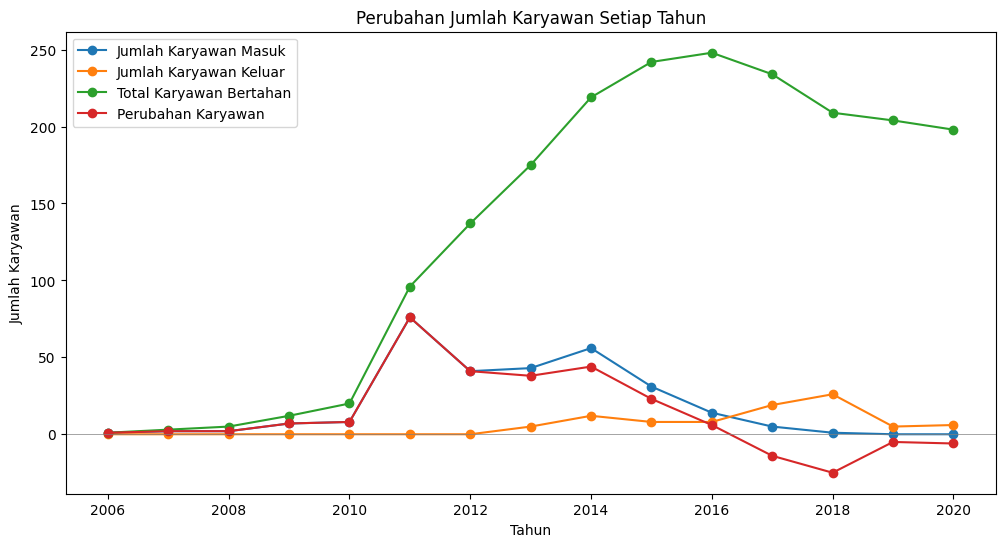

In [ ]:
# Plot perubahan jumlah karyawan setiap tahun
plt.figure(figsize=(12, 6))

plt.plot(employee_num_change['Tahun'], employee_num_change['JumlahKaryawanMasuk'], marker='o', linestyle='-', label='Jumlah Karyawan Masuk')
plt.plot(employee_num_change['Tahun'], employee_num_change['JumlahKaryawanKeluar'], marker='o', linestyle='-', label='Jumlah Karyawan Keluar')
plt.plot(employee_num_change['Tahun'], employee_num_change['TotalKaryawanBertahan'], marker='o', linestyle='-', label='Total Karyawan Bertahan')
plt.plot(employee_num_change['Tahun'], employee_num_change['PerubahanKaryawan'], marker='o', linestyle='-', label='Perubahan Karyawan')
plt.title('Perubahan Jumlah Karyawan Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.axhline(0, color='gray', linewidth=0.5)
plt.legend()
plt.show()

Key Takeaways:

- Secara keseluruhan, total karyawan bertahan jauh lebih tinggi dibandingkan karyawan yang resign.
- Pada tahun 2011 terjadi kenaikan jumlah karyawan baru yang cukup signifikan sebanyak 76 orang. Pada tahun ini terjadi rekrutmen besar-besaran di perusahaan.
- Pada tahun 2014 juga terjadi kenaikan jumlah karyawan baru, namun karyawan yang resign juga tergolong tinggi.
- Total karyawan terbanyak yang dimiliki perusahaan ialah pada tahun 2016, sebanyak 248 karyawan.
- Terjadi lonjakan jumlah karyawan yang keluar pada tahun 2017 dan 2018.



# ***Resign Reason Analysis For Employee Attrition Management Strategy***

In [ ]:
# Pisahkan DataFrame berdasarkan status resign
df_resign = df_agg[df_agg['TanggalResign'].notna()]
df_not_resign = df_agg[df_agg['TanggalResign'].isna()]

In [ ]:
# Agregasi jumlah employee berdasarkan pekerjaan untuk yang sudah resign
agg_resign = df_resign.groupby('Pekerjaan').size().reset_index(name='JumlahKaryawanResign')
agg_resign

,Pekerjaan,JumlahKaryawanResign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [ ]:
# Agregasi jumlah employee berdasarkan pekerjaan untuk yang sudah resign
agg_not_resign = df_not_resign.groupby('Pekerjaan').size().reset_index(name='JumlahKaryawanBertahan')
agg_not_resign

,Pekerjaan,JumlahKaryawanBertahan
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [ ]:
# Menggabungkan dua tabel tersebut dengan outer join
df_karyawan = pd.merge(agg_not_resign, agg_resign, on='Pekerjaan', how='outer')
df_karyawan

,Pekerjaan,JumlahKaryawanBertahan,JumlahKaryawanResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,NaN
3,Digital Product Manager,2,NaN
4,Machine Learning Engineer,2,NaN
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,NaN
7,Product Manager,11,6.0
8,Scrum Master,3,NaN
9,Software Architect,1,NaN


In [ ]:
df_karyawan = df_karyawan.fillna(0)
df_karyawan

,Pekerjaan,JumlahKaryawanBertahan,JumlahKaryawanResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


In [ ]:
# Menghitung jumlah karyawan
df_karyawan['JumlahEmployee'] = df_karyawan['JumlahKaryawanBertahan'] + df_karyawan['JumlahKaryawanResign']
df_karyawan

,Pekerjaan,JumlahKaryawanBertahan,JumlahKaryawanResign,JumlahEmployee
0,Data Analyst,8,8.0,16.0
1,Data Engineer,7,3.0,10.0
2,DevOps Engineer,3,0.0,3.0
3,Digital Product Manager,2,0.0,2.0
4,Machine Learning Engineer,2,0.0,2.0
5,Product Design (UI & UX),15,9.0,24.0
6,Product Design (UX Researcher),1,0.0,1.0
7,Product Manager,11,6.0,17.0
8,Scrum Master,3,0.0,3.0
9,Software Architect,1,0.0,1.0


In [ ]:
# Mengubah tipe data
df_karyawan['JumlahKaryawanResign'] = df_karyawan['JumlahKaryawanResign'].astype(int)
df_karyawan['JumlahEmployee'] = df_karyawan['JumlahEmployee'].astype(int)
df_karyawan

,Pekerjaan,JumlahKaryawanBertahan,JumlahKaryawanResign,JumlahEmployee
0,Data Analyst,8,8,16
1,Data Engineer,7,3,10
2,DevOps Engineer,3,0,3
3,Digital Product Manager,2,0,2
4,Machine Learning Engineer,2,0,2
5,Product Design (UI & UX),15,9,24
6,Product Design (UX Researcher),1,0,1
7,Product Manager,11,6,17
8,Scrum Master,3,0,3
9,Software Architect,1,0,1


In [ ]:
# Menghitung persentase jumlah employee
total_karyawan = df_karyawan['JumlahEmployee'].sum()
df_karyawan['PersentaseEmployee'] = df_karyawan['JumlahKaryawanBertahan'] / total_karyawan*100
df_karyawan

,Pekerjaan,JumlahKaryawanBertahan,JumlahKaryawanResign,JumlahEmployee,PersentaseEmployee
0,Data Analyst,8,8,16,2.787456
1,Data Engineer,7,3,10,2.439024
2,DevOps Engineer,3,0,3,1.045296
3,Digital Product Manager,2,0,2,0.696864
4,Machine Learning Engineer,2,0,2,0.696864
5,Product Design (UI & UX),15,9,24,5.226481
6,Product Design (UX Researcher),1,0,1,0.348432
7,Product Manager,11,6,17,3.832753
8,Scrum Master,3,0,3,1.045296
9,Software Architect,1,0,1,0.348432


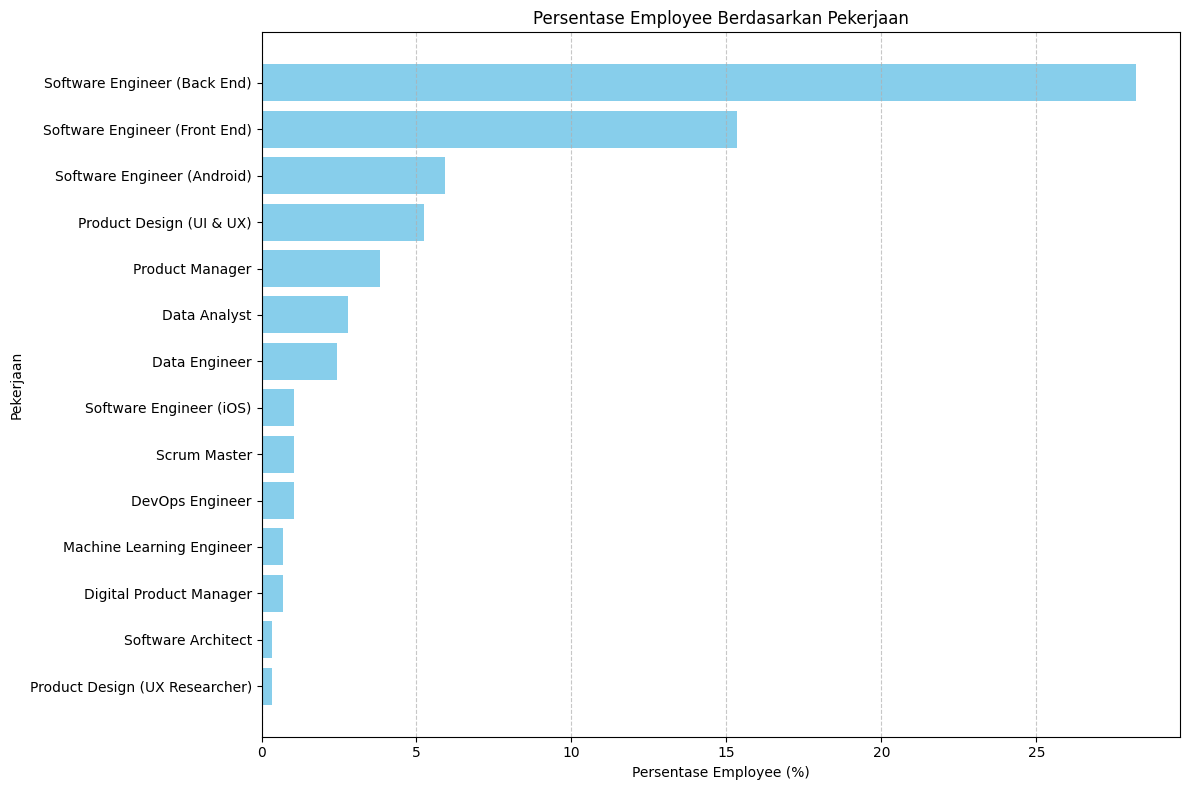

In [ ]:
# Membuat plot persentase karyawan yang masih menetap
df_karyawan = df_karyawan.sort_values(by='PersentaseEmployee', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(df_karyawan['Pekerjaan'], df_karyawan['PersentaseEmployee'], color='skyblue')
plt.xlabel('Persentase Employee (%)')
plt.ylabel('Pekerjaan')
plt.title('Persentase Employee Berdasarkan Pekerjaan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung jumlah karyawan resign per divisi
resign_per_divisi = df_resign.groupby(['Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahKaryawanResign')
resign_per_divisi.sample(10)

,Pekerjaan,JenjangKarir,PerformancePegawai,AlasanResign,JumlahKaryawanResign
20,Product Manager,Freshgraduate_program,Sangat_bagus,leadership,1
23,Software Engineer (Android),Freshgraduate_program,Bagus,leadership,1
51,Software Engineer (Back End),Senior_level,Biasa,kejelasan_karir,1
57,Software Engineer (Front End),Freshgraduate_program,Biasa,kejelasan_karir,1
62,Software Engineer (Front End),Mid_level,Bagus,leadership,1
22,Product Manager,Mid_level,Sangat_kurang,jam_kerja,1
66,Software Engineer (Front End),Mid_level,Kurang,tidak_bahagia,1
4,Data Analyst,Freshgraduate_program,Sangat_bagus,toxic_culture,3
6,Data Engineer,Freshgraduate_program,Sangat_bagus,apresiasi,1
45,Software Engineer (Back End),Mid_level,Sangat_bagus,internal_conflict,1


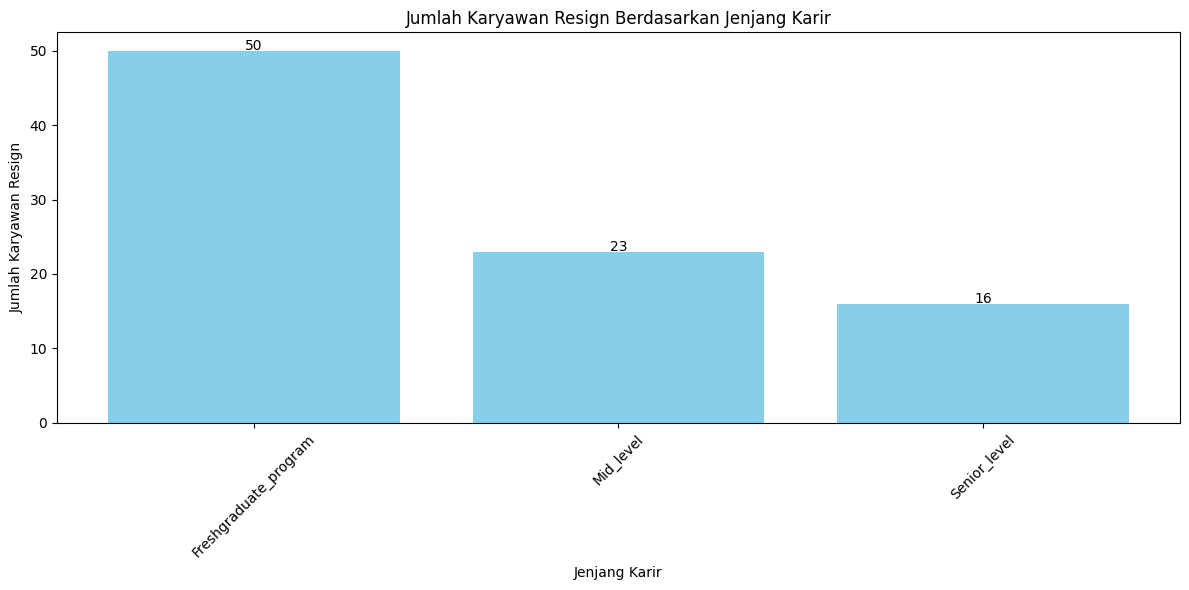

In [ ]:
# Mengelompokkan data berdasarkan JenjangKarir
jenjang_karir_totals = resign_per_divisi.groupby('JenjangKarir')['JumlahKaryawanResign'].sum().reset_index()
jenjang_karir_totals = jenjang_karir_totals.sort_values(by='JumlahKaryawanResign', ascending=False)

# Plot Jenjang Karir
plt.figure(figsize=(12, 6))
bars = plt.bar(jenjang_karir_totals['JenjangKarir'], jenjang_karir_totals['JumlahKaryawanResign'], color='skyblue')

# Menambahkan angka di setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.3,
             f'{bar.get_height()}', ha='center', va='bottom', color='black')

plt.xlabel('Jenjang Karir')
plt.ylabel('Jumlah Karyawan Resign')
plt.title('Jumlah Karyawan Resign Berdasarkan Jenjang Karir')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

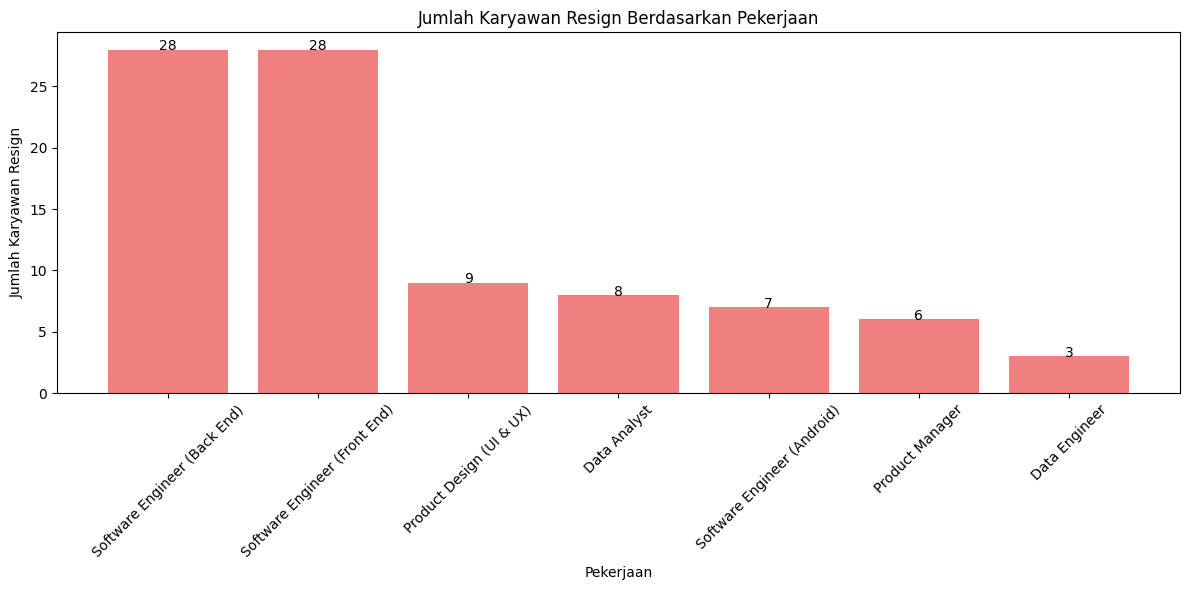

In [ ]:
# Mengelompokkan data berdasarkan Divisi
divisi_totals = resign_per_divisi.groupby('Pekerjaan')['JumlahKaryawanResign'].sum().reset_index()
divisi_totals = divisi_totals.sort_values(by='JumlahKaryawanResign', ascending=False)

# Plot Divisi
plt.figure(figsize=(12, 6))
bars = plt.bar(divisi_totals['Pekerjaan'], divisi_totals['JumlahKaryawanResign'], color='lightcoral')

# Menambahkan angka di setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.3,
             f'{bar.get_height()}', ha='center', va='bottom', color='black')

plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Karyawan Resign')
plt.title('Jumlah Karyawan Resign Berdasarkan Pekerjaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

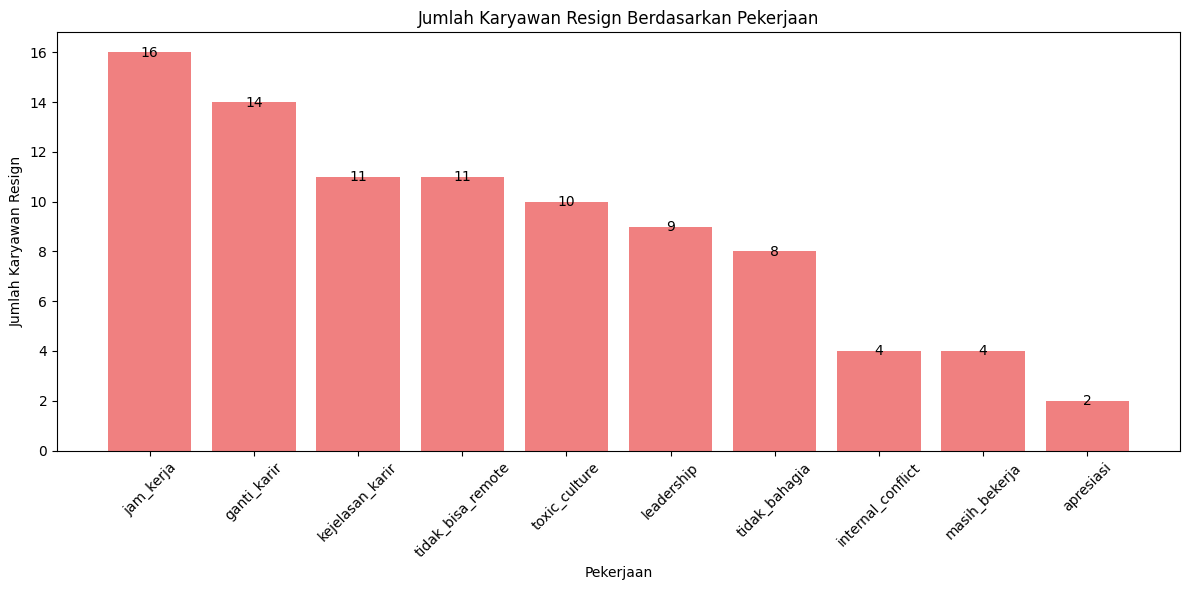

In [ ]:
# Mengelompokkan data berdasarkan Divisi
alasan_resign = resign_per_divisi.groupby('AlasanResign')['JumlahKaryawanResign'].sum().reset_index()
alasan_resign = alasan_resign.sort_values(by='JumlahKaryawanResign', ascending=False)

# Plot Divisi
plt.figure(figsize=(12, 6))
bars = plt.bar(alasan_resign['AlasanResign'], alasan_resign['JumlahKaryawanResign'], color='lightcoral')

# Menambahkan angka di setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.3,
             f'{bar.get_height()}', ha='center', va='bottom', color='black')

plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Karyawan Resign')
plt.title('Jumlah Karyawan Resign Berdasarkan Pekerjaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat kita simpulkan bahwa:
- Karyawan yang paling banyak resign ialah karyawan Fresh Graduate.
- Pekerjaan yang paling banyak ditinggal karyawan untuk resign adalah Software Engineer (Back End), Software Engineer (Front End).
- Kebanyakan karyawan resign karena alasan jam kerja, ingin ganti karir, dan kejelasan karir.

# ***Build An Automated Resignation Behavior Prediction Using Machine Learning***

In [ ]:
df2 = df1.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [ ]:
df2.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [ ]:
# Mengganti tipe data
df2['TanggalLahir'] = pd.to_datetime(df2['TanggalLahir'])
df2['TanggalHiring'] = pd.to_datetime(df2['TanggalHiring'])
df2['TanggalPenilaianKaryawan'] = pd.to_datetime(df2['TanggalPenilaianKaryawan'])

In [ ]:
# Membuat kolom 'StatusBekerja' berdasarkan 'TanggalResign'
df2['StatusBekerja'] = df2['TanggalResign'].apply(lambda x: 'Bekerja' if x == '-' else 'Resign')

In [ ]:
# Drop kolom tanggal resign
df2.drop(columns=['TanggalResign'], inplace=True)

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

## **Handle Outliers**

In [ ]:
num = df2.select_dtypes(include=[int, float]).columns.tolist()

In [ ]:
# Menampilkan jumlah data sebelum penanganan outliers
jumlah_data_sebelum = df2.shape[0]
print(f"Jumlah data sebelum penanganan outliers: {jumlah_data_sebelum}")

# Menggunakan metode IQR untuk mendeteksi outliers pada kolom numerik
Q1 = df2[num].quantile(0.25)
Q3 = df2[num].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outliers sebagai data yang berada di luar rentang Q1 - 1.5*IQR dan Q3 + 1.5*IQR
outliers = (df2[num] < (Q1 - 1.5 * IQR)) | (df2[num] > (Q3 + 1.5 * IQR))

# Menghapus baris yang memiliki outliers
df_clean = df2[~outliers.any(axis=1)]

# Menampilkan jumlah data setelah penanganan outliers
jumlah_data_setelah = df_clean.shape[0]
print(f"Jumlah data setelah penanganan outliers: {jumlah_data_setelah}")

Jumlah data sebelum penanganan outliers: 287
Jumlah data setelah penanganan outliers: 195


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            195 non-null    object        
 1   EnterpriseID                        195 non-null    int64         
 2   StatusPernikahan                    195 non-null    object        
 3   JenisKelamin                        195 non-null    object        
 4   StatusKepegawaian                   195 non-null    object        
 5   Pekerjaan                           195 non-null    object        
 6   JenjangKarir                        195 non-null    object        
 7   PerformancePegawai                  195 non-null    object        
 8   AsalDaerah                          195 non-null    object        
 9   HiringPlatform                      195 non-null    object        
 10  SkorSurveyEngagement           

### **Feature Engineering**

In [ ]:
df_encoded = df_clean.copy()

In [ ]:
# Drop columns yang tidak diperlukan
df_encoded.drop(columns=['Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'JenisKelamin', 'AsalDaerah', 'StatusPernikahan', 'TingkatPendidikan'], inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusKepegawaian                   195 non-null    object 
 1   Pekerjaan                           195 non-null    object 
 2   JenjangKarir                        195 non-null    object 
 3   PerformancePegawai                  195 non-null    object 
 4   HiringPlatform                      195 non-null    object 
 5   SkorSurveyEngagement                195 non-null    int64  
 6   SkorKepuasanPegawai                 195 non-null    float64
 7   JumlahKeikutsertaanProjek           195 non-null    float64
 8   JumlahKeterlambatanSebulanTerakhir  195 non-null    float64
 9   JumlahKetidakhadiran                195 non-null    float64
 10  AlasanResign                        195 non-null    object 
 11  StatusBekerja                       195 non-null  

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Menggunakan LabelEncoder untuk kolom yang ada di df
df_encoded = pd.get_dummies(df_encoded, columns=['Pekerjaan', 'HiringPlatform'], prefix=['Pekerjaan', 'Platform'])

le = LabelEncoder()

# Daftar kolom yang akan diencode
column_le = ['AlasanResign', 'PerformancePegawai', 'JenjangKarir', 'StatusKepegawaian', 'StatusBekerja']

for column in column_le:
    if column in df_encoded.columns:
        df_encoded[column + '_encoded'] = le.fit_transform(df_encoded[column])
        print(f"Mapping for column '{column}':")
        for class_label in le.classes_:
            print(f"{class_label}: {le.transform([class_label])[0]}")
        print("\n")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

df_encoded.head()

Mapping for column 'AlasanResign':
apresiasi: 0
ganti_karir: 1
internal_conflict: 2
jam_kerja: 3
kejelasan_karir: 4
leadership: 5
masih_bekerja: 6
tidak_bahagia: 7
tidak_bisa_remote: 8
toxic_culture: 9


Mapping for column 'PerformancePegawai':
Bagus: 0
Biasa: 1
Kurang: 2
Sangat_bagus: 3
Sangat_kurang: 4


Mapping for column 'JenjangKarir':
Freshgraduate_program: 0
Mid_level: 1
Senior_level: 2


Mapping for column 'StatusKepegawaian':
FullTime: 0
Internship: 1
Outsource: 2


Mapping for column 'StatusBekerja':
Bekerja: 0
Resign: 1




,StatusKepegawaian,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,AlasanResign,StatusBekerja,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Platform_CareerBuilder,Platform_Diversity_Job_Fair,Platform_Employee_Referral,Platform_Google_Search,Platform_Indeed,Platform_LinkedIn,Platform_On-line_Web_application,Platform_Other,Platform_Website,AlasanResign_encoded,PerformancePegawai_encoded,JenjangKarir_encoded,StatusKepegawaian_encoded,StatusBekerja_encoded
0,Outsource,Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,masih_bekerja,Bekerja,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,6,3,0,2,0
2,FullTime,Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,jam_kerja,Resign,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,3,0,0,0,1
4,FullTime,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,11.0,ganti_karir,Resign,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,0,0,1
7,FullTime,Senior_level,Kurang,2,5.0,0.0,0.0,4.0,masih_bekerja,Bekerja,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,6,2,2,0,0
8,FullTime,Senior_level,Sangat_kurang,3,4.0,0.0,0.0,5.0,masih_bekerja,Bekerja,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,6,4,2,0,0


In [ ]:
df_encoded.drop(columns=['PerformancePegawai', 'AlasanResign', 'StatusBekerja', 'JenjangKarir', 'StatusKepegawaian'], inplace=True)

In [ ]:
# Mengganti True/False dengan 1/0
df_encoded.replace({True: 1, False: 0}, inplace=True)

In [ ]:
df_encoded.head()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Platform_CareerBuilder,Platform_Diversity_Job_Fair,Platform_Employee_Referral,Platform_Google_Search,Platform_Indeed,Platform_LinkedIn,Platform_On-line_Web_application,Platform_Other,Platform_Website,AlasanResign_encoded,PerformancePegawai_encoded,JenjangKarir_encoded,StatusKepegawaian_encoded,StatusBekerja_encoded
0,4,4.0,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6,3,0,2,0
2,4,3.0,0.0,0.0,11.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3,0,0,0,1
4,3,3.0,0.0,0.0,11.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,2,5.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,6,2,2,0,0
8,3,4.0,0.0,0.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6,4,2,0,0


### *Split Data*

In [ ]:
df_split= df_encoded.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import time
import pandas as pd

# split data
X = df_split.drop(columns = 'StatusBekerja_encoded')
y = df_split['StatusBekerja_encoded']

# Split data to the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***Modeling***

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Define Grid Parameters for Hyperparameter Tuning
grid_parameters = [
    {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},  # RandomForest
    {'C': [0.1, 1, 10], 'solver': ['liblinear']},  # LogisticRegression
    {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},  # DecisionTree
    {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]},  # AdaBoost
    {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},  # ExtraTrees
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},  # KNeighbors
    {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 1]}  # XGBClassifier
]

In [ ]:
# Evaluate Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

def evaluate_model(X_train, X_test, y_train, y_test, model, hyperparameters, cv=5, scoring_fit='accuracy'):
    gs = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0)

    start = time.time()
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    end = time.time()

    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=1)

    return [accuracy, precision, recall, (end-start)]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Model Predict without normalisasi
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
ad = AdaBoostClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
knn  = KNeighborsClassifier()
xgb= XGBClassifier(random_state=42)

models = [rf, lr, dt, ad, et, knn, xgb]

In [ ]:
# Evaluate models
models_preds_norm = []
for i, model in enumerate(models):
    hyperparameters = grid_parameters[i]
    result = evaluate_model(X_train_smote, X_test_scaled, y_train_smote, y_test, model, hyperparameters, cv=5, scoring_fit='accuracy')
    models_preds_norm.append(result)

In [ ]:
# Create dataframe for the metrics
df_result_norm = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'ExtraTress', 'KNNeighbors']})
df_norm = pd.DataFrame(data = models_preds_norm, columns = ['Acc', 'Prec', 'Recall', 'Time Elapsed'])
df_metrics_norm = df_result_norm.join(df_norm)
df_metrics_norm = df_metrics_norm.sort_values('Acc', ascending = False, ignore_index = True)

# Show the dataframe
df_metrics_norm

,Model,Acc,Prec,Recall,Time Elapsed
0,Random Forest,0.966102,1.000000,0.888889,0.157220
1,AdaBoost,0.966102,1.000000,0.888889,5.904674
2,KNNeighbors,0.966102,1.000000,0.888889,1.761770
3,Logistic Regression,0.898305,1.000000,0.666667,12.171081
4,XGBoost,0.813559,0.769231,0.555556,10.557507
5,Decision Tree,0.728814,0.555556,0.555556,0.086862
6,ExtraTress,0.610169,0.368421,0.388889,0.171677


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
# Perform cross-validation on the resampled training data
cross_val_scores = cross_val_score(dt, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cross_val_scores}')
print(f'Mean Accuracy: {cross_val_scores.mean()}')

# Predict using cross-validation on the resampled training data
y_pred = cross_val_predict(rf, X_train_smote, y_train_smote, cv=5)

Cross-validation Accuracy Scores: [0.97435897 0.97435897 0.94736842 0.97368421 0.97368421]
Mean Accuracy: 0.9686909581646423


### *Hyperparameter Tuning*

In [ ]:
# Define the model
model = RandomForestClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9412698412698413


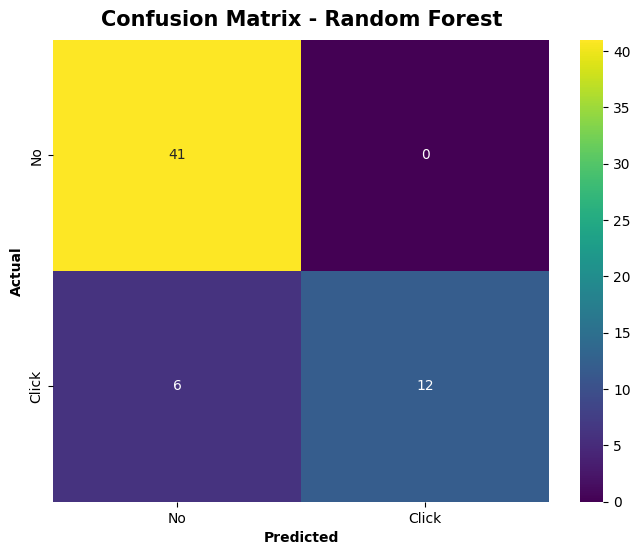

In [ ]:
# Initialize a Random Forest classifier with specific parameters
rf = RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Train the model on the resampled and scaled training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = rf.predict(X_test_scaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="viridis", xticklabels=['No', 'Click'], yticklabels=['No', 'Click'])
plt.title('Confusion Matrix - Random Forest', pad=10, fontweight='bold', fontsize=15)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.show()

- True Negatives (TN): Kotak kiri atas (41) - Model memprediksi "Not Resigned" dan sebenarnya "Not Resigned".
- False Positives (FP): Kotak kanan atas (0) - Model memprediksi "Resigned" tetapi sebenarnya "Not Resigned".
- False Negatives (FN): Kotak kiri bawah (5) - Model memprediksi "Not Resigned" tetapi sebenarnya "Resigned".
- True Positives (TP): Kotak kanan bawah (13) - Model memprediksi "Resigned" dan sebenarnya "Resigned".

### *Visualisasi ROC Curve*

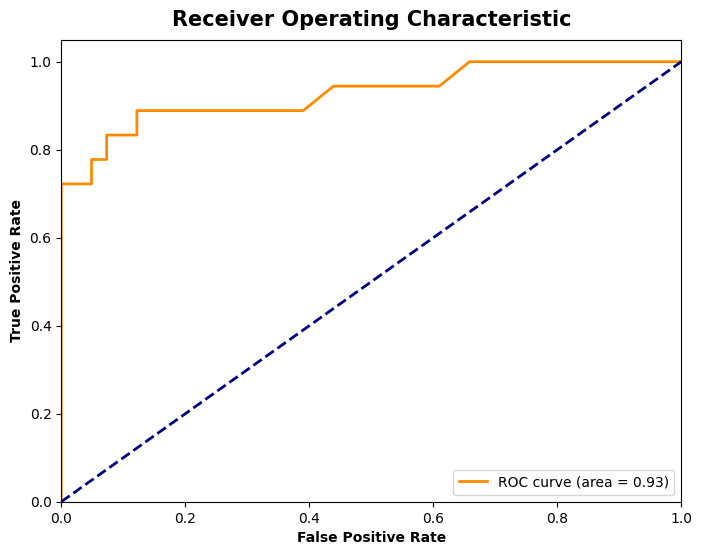

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score



# Inisialisasi model Random Forest
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Latih model dengan data pelatihan yang sudah dinormalisasi dan di-SMOTE
best_rf.fit(X_train_scaled, y_train)

# Dapatkan probabilitas prediksi untuk kelas positif
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilitas untuk kelas positif (1)

# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

# Visualisasikan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('Receiver Operating Characteristic', pad=10, fontweight='bold', fontsize=15)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Mendapatkan pentingnya fitur
feature_importances = best_rf.feature_importances_

# Membuat DataFrame
feature_importances_df = pd.DataFrame({'Feature': top_features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

NameError: name 'top_features' is not defined

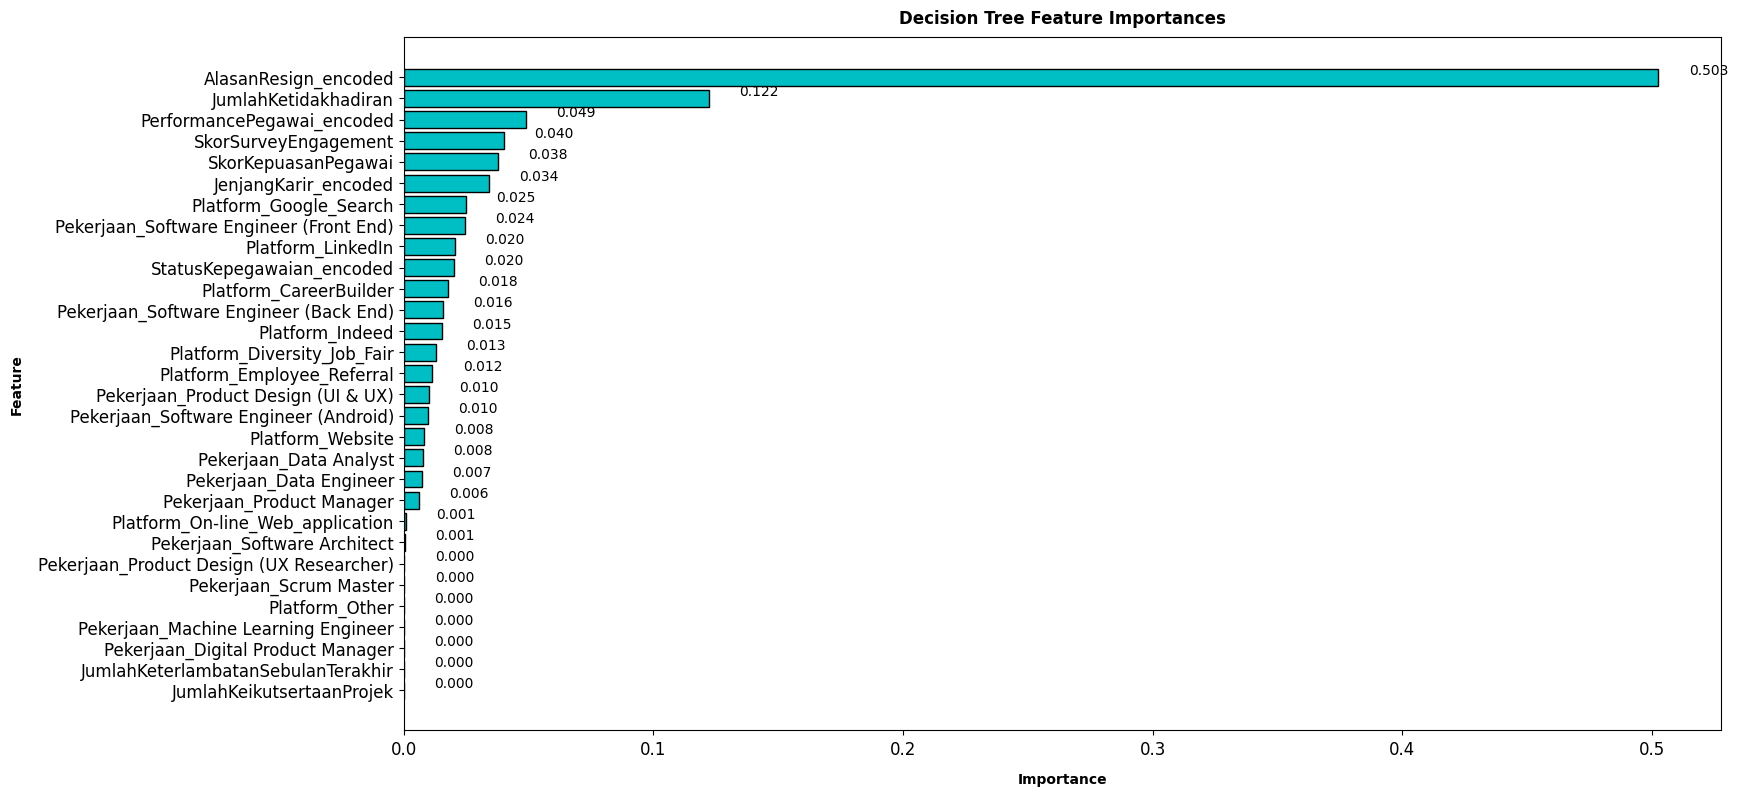

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_

# Get feature names from the DataFrame
features = X_train.columns

# Create a DataFrame with feature names and importances
df_feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the feature from the highest importances
df_feature_importance.sort_values('Importance', inplace = True)

# Plot the bar chart
plt.figure(figsize = (17, 9))
bars = plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='#00bfc4', linewidth = 1, edgecolor = 'black')
plt.xlabel('Importance', fontweight = 'bold', labelpad = 10)
plt.ylabel('Feature', fontweight = 'bold', labelpad = 10)
plt.title('Decision Tree Feature Importances', fontweight = 'bold', pad = 10)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)

# Add labels for each bar
for bar, label in zip(bars, df_feature_importance['Importance']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{label:.3f}', ha='center', va='bottom')

# Show the graph
plt.show()

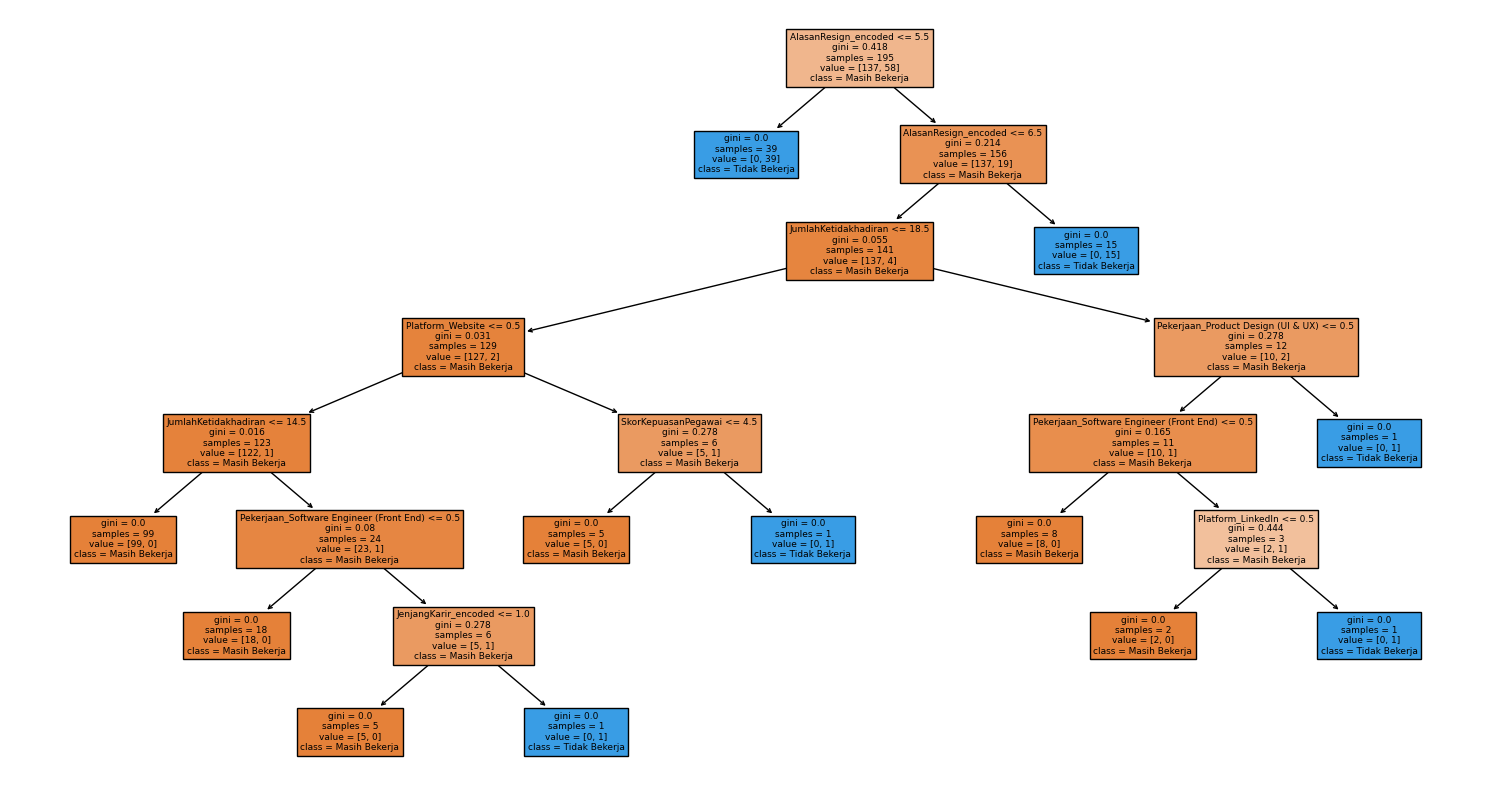

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming df_encoded contains your dataset
X = df_encoded.drop(['StatusBekerja_encoded'], axis=1)
y = df_encoded['StatusBekerja_encoded']

# Create and fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(19, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Masih Bekerja", "Tidak Bekerja"])
plt.show()

In [ ]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.8 MB/s eta 0:00:00


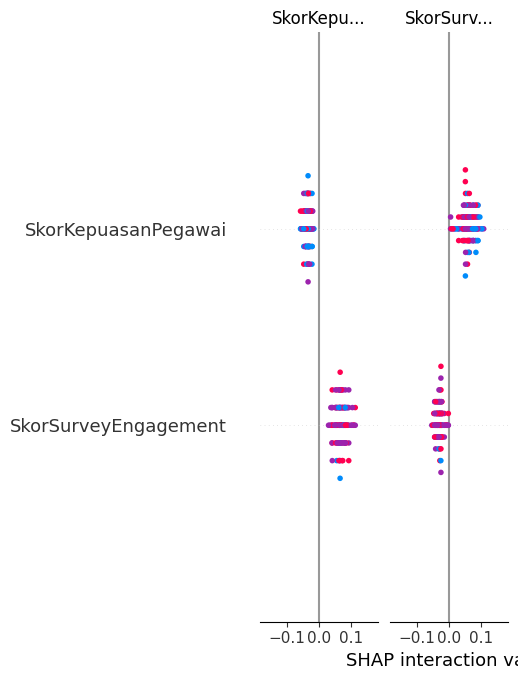

In [ ]:
import shap
import matplotlib.pyplot as plt

# Random Forest adalah model terbaik yang diperoleh
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary untuk pentingnya fitur
shap.summary_plot(shap_values, X_train)
plt.show()
